In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
quandl.ApiConfig.api_key ='R96RNAsSU_ysrdtJieMQ'
df=quandl.get("WIKI/AAPL")
df=df[['Adj. Close']]
df.tail()

,Adj. Close
Date,
2018-03-21,171.270
2018-03-22,168.845
2018-03-23,164.940
2018-03-26,172.770
2018-03-27,168.340


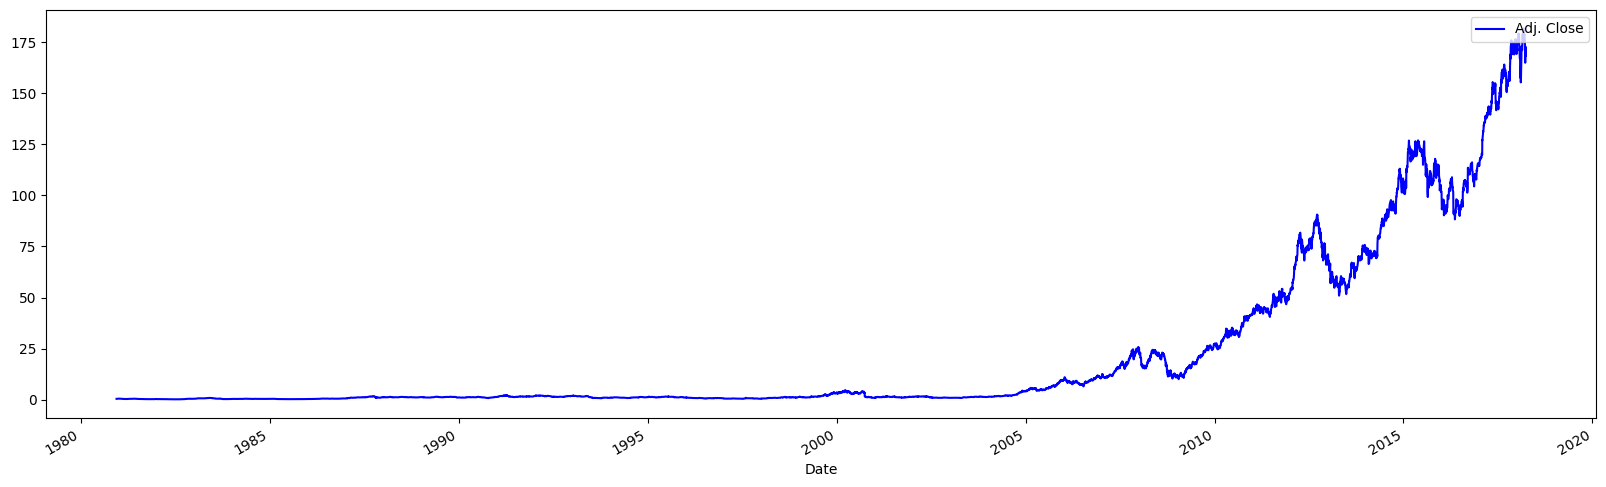

In [3]:
df['Adj. Close'].plot(figsize= (20,6), color='b')
plt.legend(loc='upper right')
plt.show()

In [4]:
forecast = 35
df['prediction']=df['Adj. Close'].shift(-forecast)
x=np.array(df.drop(['prediction'],1))
x=preprocessing.scale(x)

x_forecast=x[-forecast:]
x=x[:-forecast]

y=np.array(df['prediction'])
y=y[:-forecast]

C:\Users\Aravindh\AppData\Local\Temp\ipykernel_25212\1549988742.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=np.array(df.drop(['prediction'],1))


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf = LinearRegression()
clf.fit(x_train,y_train)

confidence = clf.score(x_test,y_test)
forecast_predicted=clf.predict(x_forecast)
print(forecast_predicted)

[167.09068319 163.51692141 159.19563927 159.8612396  166.76300303
 168.43212386 171.5348454  177.28972826 176.71628797 176.12236768
 175.32364728 176.89036806 179.91628956 183.4132513  182.819331
 182.54285086 179.34796928 180.58700989 181.2116502  181.05805013
 179.37868929 181.33453026 184.44749181 186.2292527  184.43725181
 182.87053103 183.08557113 182.44045081 179.65516943 179.5937294
 175.52844738 173.04524615 169.04652416 177.06444814 172.52812589]


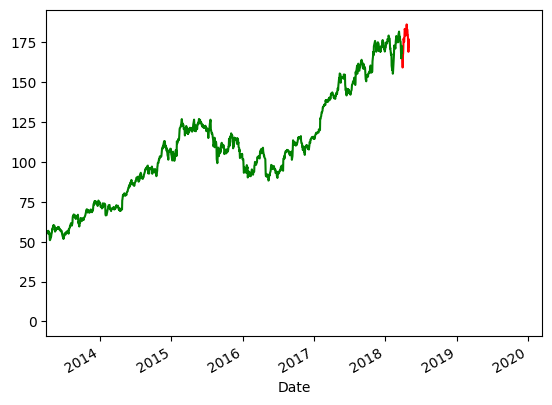

In [6]:
dates = pd.date_range(start='2018-03-28' , end='2018-05-01')
plt.plot(dates,forecast_predicted,color='r')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2013,3,30))
plt.show()